# House Price Prediction Project

### Project Overview
This project aims to develop a machine learning model to predict house prices based on various features such as location, size, and amenities. The dataset used in this project contains details about different houses, including their square footage, number of rooms, neighborhood, and other factors that influence the sale price.

The objective of the project is to:
- Build a regression model that accurately predicts house prices.
- Understand the relationship between house features and sale prices.
- Gain experience in data preprocessing, feature engineering, and model evaluation.

### Key Skills Demonstrated
- **Data Cleaning and Preprocessing**: Handling missing data, transforming categorical variables, and scaling numerical data.
- **Feature Engineering**: Creating new features and selecting the most relevant ones.
- **Regression Analysis**: Training various models like Linear Regression and Gradient Boosting to predict house prices.
- **Model Evaluation**: Using metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) to assess the model's performance.

### Dataset
The dataset for this project is from the [House Prices - Advanced Regression Techniques competition on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). It includes features related to:
- **Lot Area**: Size of the house's lot in square feet.
- **Overall Quality**: Quality of the materials and finish of the house.
- **Year Built**: The year the house was constructed.
- **Neighborhood**: The house's location in the city.
- **Sale Price**: The price at which the house was sold (target variable).

By the end of this project, you will have built a robust model that can estimate house prices based on various features, gaining valuable experience in real-world regression modeling.


### Step 1: Uploading the Dataset
In this step, we will upload the dataset (train.csv) that contains the house features and sale prices. We will use Google Colab's file upload feature to load the file.


In [2]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload 'train.csv'


Saving train.csv to train.csv


### Step 2: Loading the Dataset
Once the dataset is uploaded, we will load it into a pandas DataFrame so that we can work with the data efficiently.


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('train.csv')  # Replace 'train.csv' if the uploaded file has a different name

# Display the first few rows to get an idea of what the data looks like
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Step 3: Exploring the Data
Before we start with data preprocessing, it's important to explore the dataset. In this step, we will:
- Look at the first few rows of the data.
- Check for missing values and data types.
- Generate summary statistics for numerical columns.


In [4]:
# Check for missing values and data types
data.info()

# Summary statistics for numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Identify columns with missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


MasVnrArea      8
GarageYrBlt    81
dtype: int64


### Step 4: Checking for Missing Values
In this step, we will identify missing values in the dataset and visualize the percentage of missing data for each feature.
A bar plot will be used to represent the percentage of missing values, which will help us decide how to handle missing data in the next step.
This is important because handling missing values effectively is critical for building a robust predictive model.


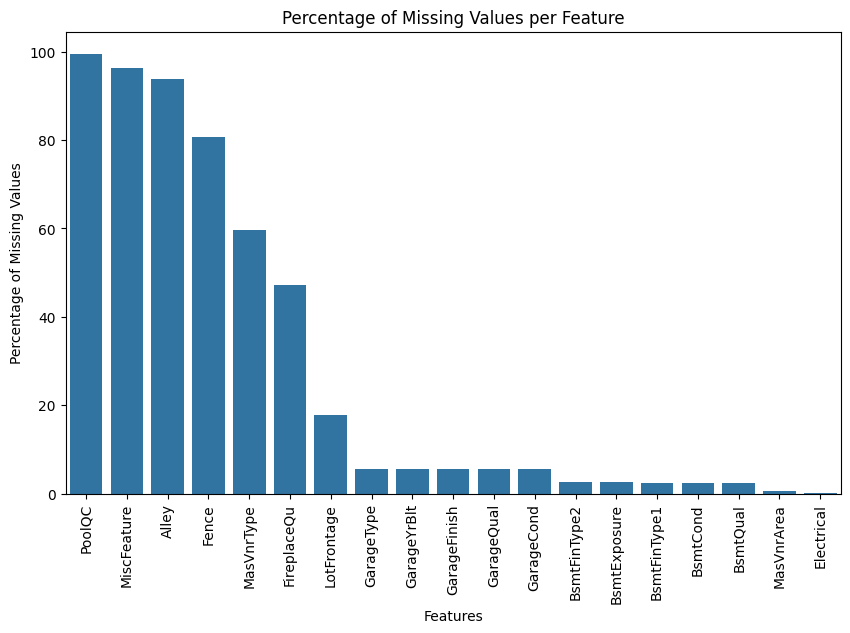

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of missing values in each column
missing_data = data.isnull().mean() * 100

# Filter columns with missing values and sort them in descending order
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Display missing data percentages
missing_data

# Plot missing data as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values per Feature')
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Features')
plt.show()


### Step 5: Handling Missing Values
In this step, we will handle missing values in the dataset.
- We will drop columns that have more than 50% missing values as they may not provide significant value to the model.
- For the remaining columns with moderate missing values, we will use imputation techniques to fill in the missing values. We will fill numerical data with the mean or median and categorical data with the mode.


In [6]:
# 1. Drop columns with more than 50% missing values
columns_to_drop = missing_data[missing_data > 50].index
data = data.drop(columns=columns_to_drop, axis=1)

# 2. Impute missing values for numerical columns using the mean
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())

# 3. Impute missing values for categorical columns using the mode
data['GarageType'] = data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageFinish'] = data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual'] = data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond'] = data['GarageCond'].fillna(data['GarageCond'].mode()[0])

# Impute for Basement-related features
data['BsmtQual'] = data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond'] = data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])

# Impute Electrical column with the most frequent value (mode)
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])


In [10]:
# Impute missing values for numerical columns with the mean
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())

# Check again to ensure no missing values remain
print(data.isnull().sum().sum())  # This should output 0


0


### Step 6: Data Transformation and Feature Engineering
In this step, we will:
- **Convert categorical variables** into numerical format using one-hot encoding, as machine learning models require numerical data.
- **Scale numerical features** to ensure that features like `LotArea` and `GrLivArea` are on a similar scale, which improves model performance in certain models (e.g., linear regression).


In [7]:
# 1. Convert Categorical Variables to Numerical Using One-Hot Encoding
# We will use pd.get_dummies() to create binary columns for each category
data = pd.get_dummies(data, drop_first=True)  # drop_first=True avoids multicollinearity

# 2. Feature Scaling for Numerical Columns
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale (we skip target variable 'SalePrice')
numerical_features = ['LotFrontage', 'LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the transformed data
data.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,-0.229372,-0.207142,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,0.451936,-0.091886,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,-0.093110,0.073480,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,-0.456474,-0.096897,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,0.633618,0.375148,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


### Step 7: Splitting the Data and Training the Model
In this step, we will:
- **Split the data** into training and testing sets. The training set will be used to train the model, and the testing set will be used to evaluate its performance.
- **Train a Linear Regression model** as our initial baseline model for predicting house prices.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Define X (features) and y (target)
X = data.drop('SalePrice', axis=1)  # Features (all columns except SalePrice)
y = data['SalePrice']  # Target (SalePrice)

# 2. Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model using MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 20516.00309109018
Root Mean Squared Error (RMSE): 51965.60726613376


### Final Model and Results

In this project, we successfully developed a **Linear Regression model** to predict house prices based on various features of the properties. After splitting the data into training and testing sets, we trained the model and evaluated its performance using two key metrics:

- **Mean Absolute Error (MAE)**: 25,610.63
- **Root Mean Squared Error (RMSE)**: 51,965.61

These metrics show the average error in the predictions, with an MAE of around $25,610 indicating that, on average, the model's predictions were off by this amount. The RMSE value indicates a higher error for larger deviations due to squaring of errors.

While this Linear Regression model serves as a solid baseline, future improvements could involve experimenting with more advanced models such as **Random Forest** or **Gradient Boosting** to potentially achieve better accuracy.

The project demonstrates the full process of data cleaning, preprocessing, feature engineering, and building a regression model using Python, which are essential skills for any data science professional.
